In [15]:
import gym 
import gym_sokoban
import matplotlib.pyplot as plt

In [16]:
env = gym.make('Boxoban-Val-Basic')

/Users/tranthanh/anaconda3/lib/python3.11/site-packages/gym/utils/passive_env_checker.py:174: UserWarning: WARN: Future gym versions will require that `Env.reset` can be passed a `seed` instead of using `Env.seed` for resetting the environment random number generator.
  logger.warn(
/Users/tranthanh/anaconda3/lib/python3.11/site-packages/gym/utils/passive_env_checker.py:187: UserWarning: WARN: Future gym versions will require that `Env.reset` can be passed `options` to allow the environment initialisation to be passed additional information.
  logger.warn(
/Users/tranthanh/anaconda3/lib/python3.11/site-packages/gym/utils/passive_env_checker.py:195: UserWarning: WARN: The result returned by `env.reset()` was not a tuple of the form `(obs, info)`, where `obs` is a observation and `info` is a dictionary containing additional information. Actual type: `<class 'numpy.ndarray'>`
  logger.warn(


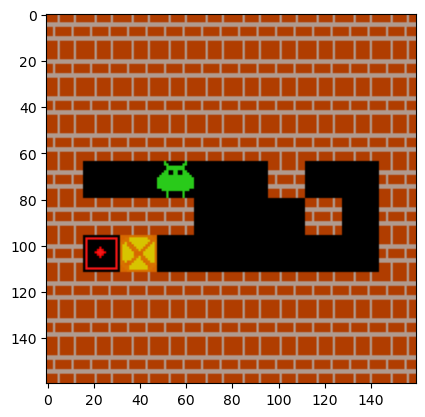

In [17]:
plt.imshow(env.reset())

In [18]:
from common.test_the_agent import test_the_agent
from common.ActorCritic import ActorCritic
import torch

In [19]:
device = torch.device('cpu')
pretrained_dict = torch.load('model.pt', map_location=device)
actor_critic = ActorCritic((3, 80, 80), 5)
actor_critic.load_state_dict(pretrained_dict)


<All keys matched successfully>

In [20]:
import torch
import gym_sokoban
import gym 
from common.ActorCritic import ActorCritic
from common.utils import hwc2chw
from common.test_the_agent import test_the_agent
import time
from IPython import display
from matplotlib import pyplot as plt

#Load model
device = torch.device('cpu')
pretrained_dict = torch.load('model.pt', map_location=device)
actor_critic = ActorCritic((3, 80, 80), 5)
actor_critic.load_state_dict(pretrained_dict)

#Make env
env = gym.make('Boxoban-Val-Basic')
for i in range(100):
    state = env.reset()
    state = hwc2chw(state, test=True)
    action = actor_critic.select_action(state.unsqueeze(0), test=1)
    next_state, reward, done, _ = env.step(action.item())
    next_state = hwc2chw(next_state, test=True)

    i = 1
    while not done:
        state = next_state
        with torch.no_grad():
            action = actor_critic.select_action(state.unsqueeze(0), test=1)
        next_state, reward, done, _ = env.step(action.item())
        next_state_ = next_state.copy()
        next_state = hwc2chw(next_state, test=True)
        plt.imshow(next_state_)
        display.clear_output(wait=True)
        plt.show()

KeyboardInterrupt: 